In [1]:
import agent
import gym
import matplotlib.pyplot as plt
from tqdm import tqdm
import utils

### Environnement

In [2]:
env = gym.make('MountainCar-v0')

### Agent

In [74]:
position_boundaries = (env.observation_space.low[0], env.observation_space.high[0])
velocity_boundaries = (env.observation_space.low[1], env.observation_space.high[1])

agent_init = {
    'discount_factor': 0.95, 
    'learning_rate': 0.5, 
    'epsilon': 0.0001,
    'num_action': env.action_space.n,
    'max_position_init': position_boundaries[0],
    'max_position_reward_bonus': 2,
    'tile_coder': {
        'num_tiles': 8,
        'num_tilings': 20,
        'hash_size': 4096,
        'position_boundaries': position_boundaries, 
        'velocity_boundaries': velocity_boundaries
    }
}
q_learning_agent = agent.QLearningAgent(agent_init)

### RUN

In [75]:
timesteps_per_episode = list()
rewards_per_episode = list()
epoch_size = 50
n_episode = 1500
t_max_per_episode = 200
verbose = False
graphical = False

In [76]:
assert n_episode % epoch_size == 0, f"epoch_size ({epoch_size}) must be a divisor of n_episode ({n_episode})"

for i_episode in tqdm(range(n_episode)):
    
    rewards = 0
    state = env.reset()
    next_action = q_learning_agent.episode_init(state)
    
    for t in range(t_max_per_episode):
        if graphical:
            env.render()
            
        state, reward, done, info = env.step(next_action)
        #reward = q_learning_agent.max_position_reward_function(state[0], reward)
        next_action = q_learning_agent.update(state, reward, done)
        rewards += reward
        if done:
            break
    timesteps_per_episode.append(t)
    rewards_per_episode.append(rewards)
    
env.close()

100%|██████████| 1500/1500 [00:52<00:00, 28.32it/s]


### ANALYSIS

In [77]:
timesteps_per_episode = np.array(timesteps_per_episode)
timesteps_per_episode.min()

82

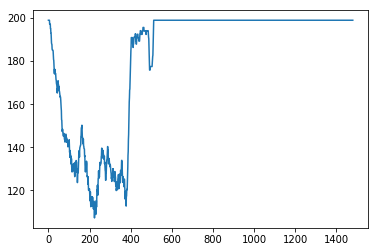

In [81]:
timesteps_per_episode_rolling_mean = utils.moving_average(timesteps_per_episode, n=20)
plt.plot(range(len(timesteps_per_episode_rolling_mean)), timesteps_per_episode_rolling_mean)

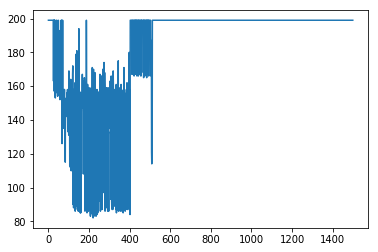

In [79]:
plt.plot(range(n_episode), timesteps_per_episode)

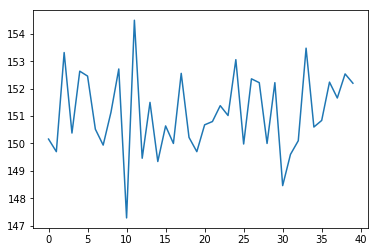

In [14]:
plt.plot(range(int(n_episode/epoch_size)), timesteps_per_episode.reshape(epoch_size, int(n_episode/epoch_size)).mean(axis=0))

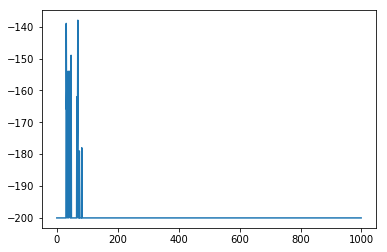

In [10]:
rewards_per_episode = np.array(rewards_per_episode)
plt.plot(range(n_episode), rewards_per_episode)

In [15]:
env.close()

In [21]:
q_learning_agent.w

array([[ 91.84806772,  66.39282485,  54.78360347, ...,   0.        ,
          0.        ,   0.        ],
       [ -2.63068936,  -2.64129066,  -2.8070648 , ...,   0.        ,
          0.        ,   0.        ],
       [516.66266669, 531.73090148, 692.22956407, ...,   0.        ,
          0.        ,   0.        ]])

In [73]:
q_learning_agent.learning_rate*20

0.7